In [4]:
import pandas as pd
import json
import os 
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

### Table of Contents

* [1.Classifying genres by energy and danceability ](#chapter1)
    * [Section 1.1](#section_1_1)
    * [Section 1.2](#Section_1_2)
        
* [2.Adding European diversifications of these genres](#chapter2)
    * [Section 2.1](#section_2_1)
   

### 1.Classifying music genres by energy and danceability: <a class="anchor" id="chapter1"></a>

#### Section 1.1: Analysing the relation between energy and danceability within genres: <a class="anchor" id="section_1_1"></a>

First we need to analyse the relation between energy and danceability: 


-Energy: describe como de intenso y activo es la cancion. Canciones con mucha energia tienen sensacion de rapidas, fuertes y ruidosas.


-Baileabilidad: describe como de bailable es un tema en funcion de su tempo, la estibilidad del ritmo y regularidad en general. 

In [5]:
calambre = pd.read_csv("Cleaning_Data.csv")

In [6]:
calambre.head()

,danceability,energy,genre
0,0.831,0.814,dark trap
1,0.719,0.493,dark trap
2,0.850,0.893,dark trap
3,0.476,0.781,dark trap
4,0.798,0.624,dark trap


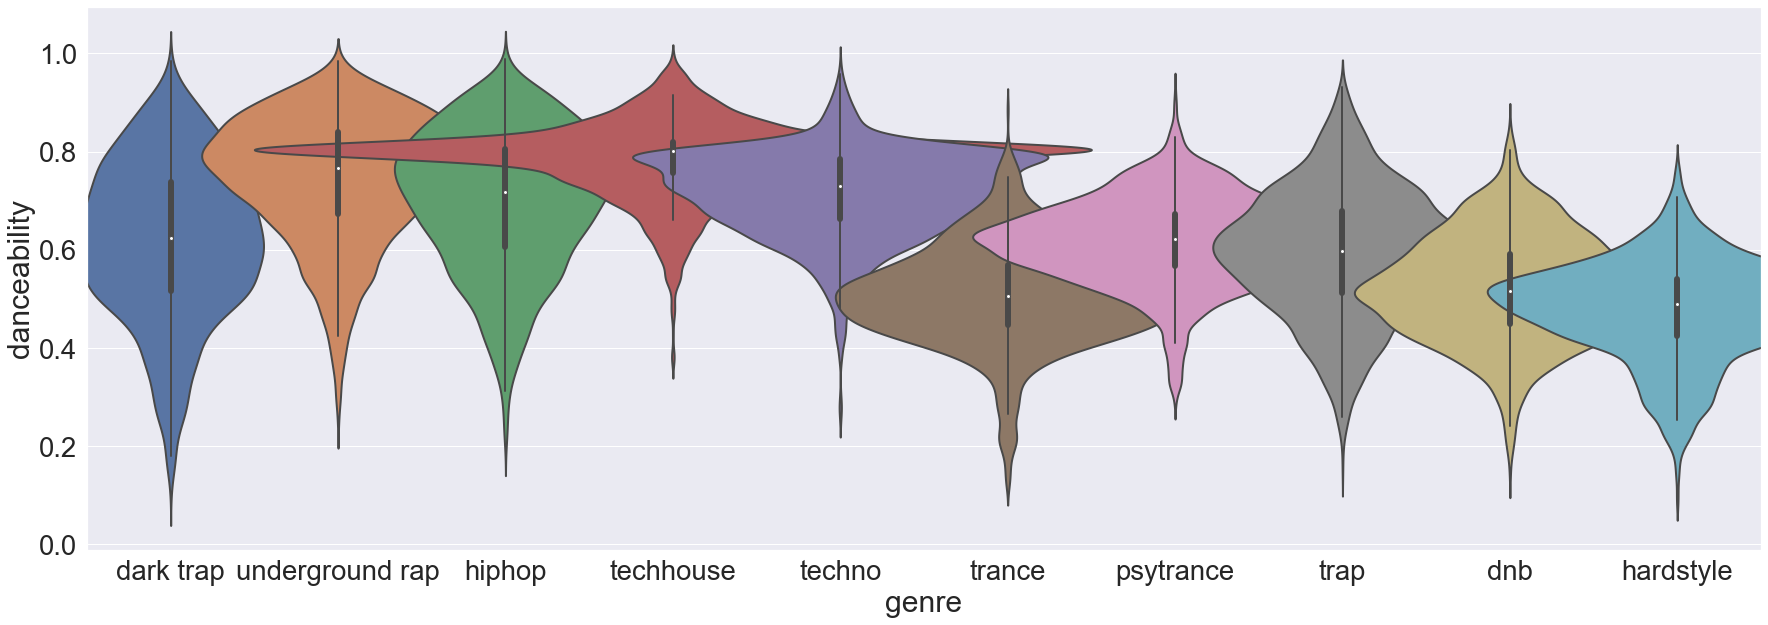

In [7]:
sns.set(font_scale=2.5)
plt.subplots(figsize= (30,10))
sns.violinplot(x='genre', y = 'danceability', data= calambre, gridsize=800, width=5.0, linewidth=2)
plt.show()

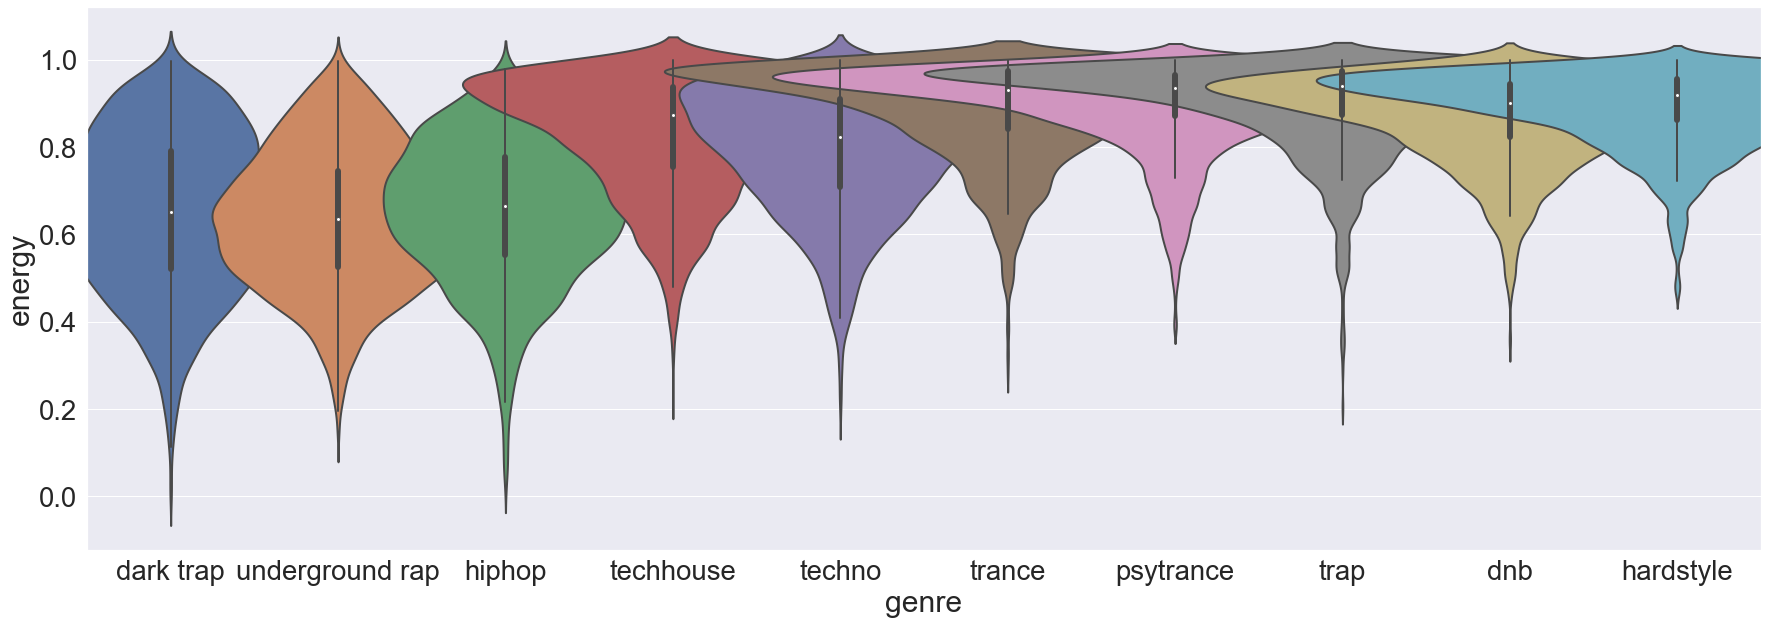

In [8]:
sns.set(font_scale=2.5)
plt.subplots(figsize= (30,10))
sns.violinplot(x='genre', y = 'energy', data= calambre, gridsize=800, width=5.0, linewidth=2)
plt.show()

#### On this violin plots the most energetic genres[-1:-5], are the least danceable. So let´s dig deeper into this apparent negative relation between energy and danceability.

In [9]:
calambre[['danceability', 'energy']].corr()

,danceability,energy
danceability,1.000000,-0.345824
energy,-0.345824,1.000000


#### The negative correlation of all genres between energy and danceabillity is quite small

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='energy', ylabel='danceability'>

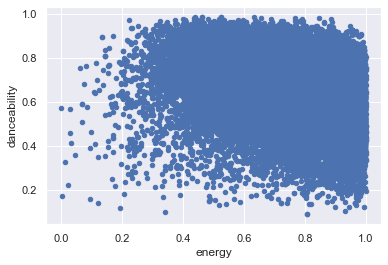

In [10]:
sns.set(font_scale=1)
calambre.plot.scatter(x='energy', y='danceability')

#### But let´s look at this correlation by genres

In [11]:
calambre.groupby('genre')[['danceability','energy']].corr()

danceability    energy
genre                                               
dark trap       danceability      1.000000 -0.147589
                energy           -0.147589  1.000000
dnb             danceability      1.000000 -0.244411
                energy           -0.244411  1.000000
hardstyle       danceability      1.000000  0.079601
                energy            0.079601  1.000000
hiphop          danceability      1.000000 -0.047332
                energy           -0.047332  1.000000
psytrance       danceability      1.000000 -0.318081
                energy           -0.318081  1.000000
techhouse       danceability      1.000000 -0.310759
                energy           -0.310759  1.000000
techno          danceability      1.000000 -0.255809
                energy           -0.255809  1.000000
trance          danceability      1.000000 -0.347946
                energy           -0.347946  1.000000
trap            danceability      1.000000 -0.093850
                energy           -0.093850  1.000000
underground rap danceability      1.000000 -0.217778
                energy           -0.217778  1.000000

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='energy', ylabel='danceability'>

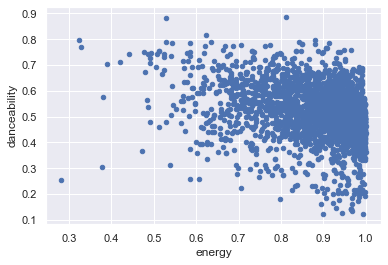

In [12]:
sns.set(font_scale=1)
calambre.loc[calambre['genre']=='trance'].plot.scatter(x='energy', y='danceability')

#### Section 1.2: Genres with higher energy and danceability <a class="anchor" id="section_1_2"></a>

In [19]:
calambres = calambre.groupby("genre")[['danceability','energy']].agg({'danceability':[np.std,np.mean], 'energy':[np.std, np.mean]})

In [21]:
calambres

danceability              energy          
                         std      mean       std      mean
genre                                                     
dark trap           0.161002  0.618834  0.180810  0.646851
dnb                 0.106605  0.520944  0.097925  0.873433
hardstyle           0.099230  0.478027  0.082729  0.896238
hiphop              0.142183  0.698982  0.162416  0.654418
psytrance           0.086189  0.617462  0.093983  0.902392
techhouse           0.073436  0.786794  0.131920  0.834481
techno              0.088053  0.715742  0.141080  0.795714
trance              0.102201  0.507724  0.107369  0.892435
trap                0.128669  0.593180  0.098066  0.906060
underground rap     0.128180  0.744658  0.155994  0.635776

In [22]:
energy_mean = calambre.energy.mean()

In [23]:
dance_mean = calambre.danceability.mean()

In [24]:
calambres.loc[(calambres['danceability', ('mean')] > dance_mean) & (calambres['energy', ('mean')] > energy_mean)]

danceability             energy          
                   std      mean      std      mean
genre                                              
techhouse     0.073436  0.786794  0.13192  0.834481
techno        0.088053  0.715742  0.14108  0.795714

### 2.Adding European varieties of these genres <a class="anchor" id="chapter2"></a>

In [26]:
calambrazos = pd.read_csv("web_scrapping_genre.csv")

#### Section 2.1: List to discover all the varities of the most energetic and danceable genres <a class="anchor" id="section_2_1"></a>

In [27]:
calambrazos

,techno,techhouse
0,austrian techno,dutch tech house
1,belgian techno,french tech house
2,berlin minimal techno,german tech house
3,bleep techno,italian tech house
4,danish techno,latin tech house
5,dark techno,minimal tech house
6,deep hardtechno,tech house
7,deep techno,uk tech house
8,destroy techno,NaN
9,dub techno,NaN
